# import all necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# load the dataset

In [4]:
main_dataset = pd.read_csv(f"D:\kiggle file\Bodavan\disease_prediction_from_symptom\dataset.csv")
train_dataset = pd.read_csv(f"D:\kiggle file\Bodavan\disease_prediction_from_symptom\Training.csv")
test_dataset = pd.read_csv(f"D:\kiggle file\Bodavan\disease_prediction_from_symptom\Testing.csv")

# let's explore the main dataset

In [6]:
main_dataset.head(10)

,Disease,Symptom_0,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIDS,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIDS,muscle_wasting,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle_wasting,patches_in_throat,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIDS,muscle_wasting,patches_in_throat,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acne,skin_rash,pus_filled_pimples,blackheads,scurrying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Acne,pus_filled_pimples,blackheads,scurrying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Acne,skin_rash,blackheads,scurrying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Acne,skin_rash,pus_filled_pimples,scurrying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Acne,skin_rash,pus_filled_pimples,blackheads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# type of all disease
main_dataset.Disease.unique()

array(['AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis',
       'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox',
       'Chronic cholestasis', 'Common Cold', 'Covid', 'Dengue',
       'Diabetes ', 'Dimorphic hemorrhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D',
       'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthritis', 'Paralysis (brain hemorrhage)',
       'Paroxysmal Positional Vertigo', 'Peptic ulcer disease',
       'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid',
       'Urinary tract infection', 'Varicose veins'], dtype=object)

In [10]:
# total number of disease
main_dataset.Disease.nunique()

42

In [17]:
# Define the diseases for which you want to find symptoms
diseases = ['AIDS', 'Acne','Chicken pox']

# Initialize a dictionary to store symptoms for each disease
disease_symptoms = {}

# Loop through each disease and find associated symptoms
for disease in diseases:
    symptoms = main_dataset[main_dataset['Disease'] == disease][main_dataset.columns[1:]].values.flatten()
    symptoms = [symptom for symptom in symptoms if pd.notnull(symptom)]
    disease_symptoms[disease] = symptoms

# Print the symptoms for each disease
for disease, symptoms in disease_symptoms.items():
    print(f"Symptoms for {disease}:")
    print(symptoms)
    print()

Symptoms for AIDS:
[' muscle_wasting', ' patches_in_throat', ' high_fever', ' extra_marital_contacts', ' patches_in_throat', ' high_fever', ' extra_marital_contacts', ' muscle_wasting', ' high_fever', ' extra_marital_contacts', ' muscle_wasting', ' patches_in_throat', ' extra_marital_contacts', ' muscle_wasting', ' patches_in_throat', ' high_fever']

Symptoms for Acne:
[' skin_rash', ' pus_filled_pimples', ' blackheads', ' scurrying', ' pus_filled_pimples', ' blackheads', ' scurrying', ' skin_rash', ' blackheads', ' scurrying', ' skin_rash', ' pus_filled_pimples', ' scurrying', ' skin_rash', ' pus_filled_pimples', ' blackheads']

Symptoms for Chicken pox:
['itching', ' skin_rash', ' fatigue', ' lethargy', ' high_fever', ' headache', ' loss_of_appetite', ' mild_fever', ' swelled_lymph_nodes', ' malaise', ' red_spots_over_body', 'itching', ' skin_rash', ' fatigue', ' lethargy', ' headache', ' loss_of_appetite', ' mild_fever', ' swelled_lymph_nodes', ' malaise', ' red_spots_over_body', 'i

# let's explore training dataset and define the problem

In [25]:
# training dataset
train_dataset.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


# problem define - it is multi-class classification problem

- Multi-class classification is  where the goal is to classify instances into one of several possible classes. In other words, the output variable is a categorical variable with more than two possible values.
- For example, in a medical diagnosis problem, the goal might be to classify patients into one of several possible diseases based on their symptoms. Each patient can only have one disease, but there are multiple possible diseases that the patient could have.
# populer machine learning algorithms that can be used for multi-class classification problems.
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- Naive Bayes
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Neural Networks
- Naive Bayes.

# now let's train the different model and measures accuracy of them.

In [31]:
# spliting the dataset

X_train = train_dataset.drop("prognosis",axis=1)
y_train = train_dataset["prognosis"].copy()
X_test = test_dataset.drop("prognosis",axis=1)
y_test = test_dataset["prognosis"].copy()

In [53]:
# list used for accurecy and cross validation plot

model_list=[]
accuracy_list= []
cv_list=[]


# random forest model

In [54]:
# loading library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [56]:
# initialize and train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

# make prediction on test data
y_pred = rf_model.predict(X_test)

# calculate the accuracy of model
accuracy_rf = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy_rf)

# perform cross validation score
scores_rf = cross_val_score(rf_model, X_train,y_train, cv=5)
print("cross validation scores: ", scores_rf.mean())

# adding them in the list for plot
model_list.append("RF")
accuracy_list.append(accuracy_rf)
cv_list.append(scores_rf)

Accuracy:  0.9761904761904762


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


cross validation scores:  0.9836594394500265


# Decision tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# initialize and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# make prediction on test data
y_pred= dt_model.predict(X_test)

# calculating the accuracy of model
accuracy_dt = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy_dt)

# perform cross validation score
score_dt= cross_val_score(dt_model,X_train,y_train, cv=5)
print("cv score: ", score_dt.mean())

# adding them in the list for plot
model_list.append("DT")
accuracy_list.append(accuracy_dt)
cv_list.append(score_dt)

accuracy: 0.9761904761904762
cv score:  0.6107879428873612


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# K-Nearest Neighbor Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# initialize and train model model
kn_model = KNeighborsClassifier()
kn_model.fit(X_train,y_train)

# predict on test data
y_pred = kn_model.predict(X_test)

# accuracy of the model
accuracy_kn = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy_kn)

# cross validation of the model
cv_kn = cross_val_score(kn_model, X_train,y_train,cv=5)
print("cv: ",cv_kn.mean())


# adding them in the list for plot
model_list.append("KN")
accuracy_list.append(accuracy_kn)
cv_list.append(cv_kn)

accuracy:  0.9761904761904762
cv:  0.9902168164992068


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Support Vector Machines (SVM) model

In [70]:
from sklearn.svm import SVC

In [75]:
# Initialize and train the model
model_svm = SVC()
model_svm.fit(X_train,y_train)

# predict on the test data
y_pred = model_svm.predict(X_test)

#accuracy of the model
accuracy_svm = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy_svm)

#cross validation of the model
cv_svm = cross_val_score(model_svm,X_train,y_train,cv=5)
print("cv: ",cv_svm.mean())


# adding them in the list for plot
model_list.append("SVM")
accuracy_list.append(accuracy_svm)
cv_list.append(cv_svm)

accuracy:  1.0
cv:  0.9902168164992068


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Logistic Regression Classifier

In [76]:
from sklearn.linear_model import LogisticRegression

In [80]:
# initialize and train the model
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

# predict on test data
y_pred = model_lr.predict(X_test)

# accuracy of the model
accuracy_lr = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy_lr)

# cross val of the model
cv_lr = cross_val_score(model_lr,X_train,y_train,cv=5)
print("cv: ",cv_lr.mean())

# adding them in the list for plot
model_list.append("LR")
accuracy_list.append(accuracy_lr)
cv_list.append(cv_lr)

accuracy:  1.0


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


cv:  0.9967213114754099


# neural network classifier or Multilayer Perceptron Classifier

In [81]:
from sklearn.neural_network import MLPClassifier

In [85]:
# initialize and train the model
model_nn = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
model_nn.fit(X_train,y_train)

# predict on test data
y_pred = model_nn.predict(X_test)

#accuracy of the model
accuracy_nn = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy_nn)

#cross validation of the model
cv_nn = cross_val_score(model_nn,X_train,y_train,cv=5)
print("cv: ",cv_nn.mean())

# adding them in the list for plot
model_list.append("NN")
accuracy_list.append(accuracy_nn)
cv_list.append(cv_nn)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy:  0.7142857142857143


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


cv:  0.6373347435219461


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# Accuracy Comparison Plot for all the model

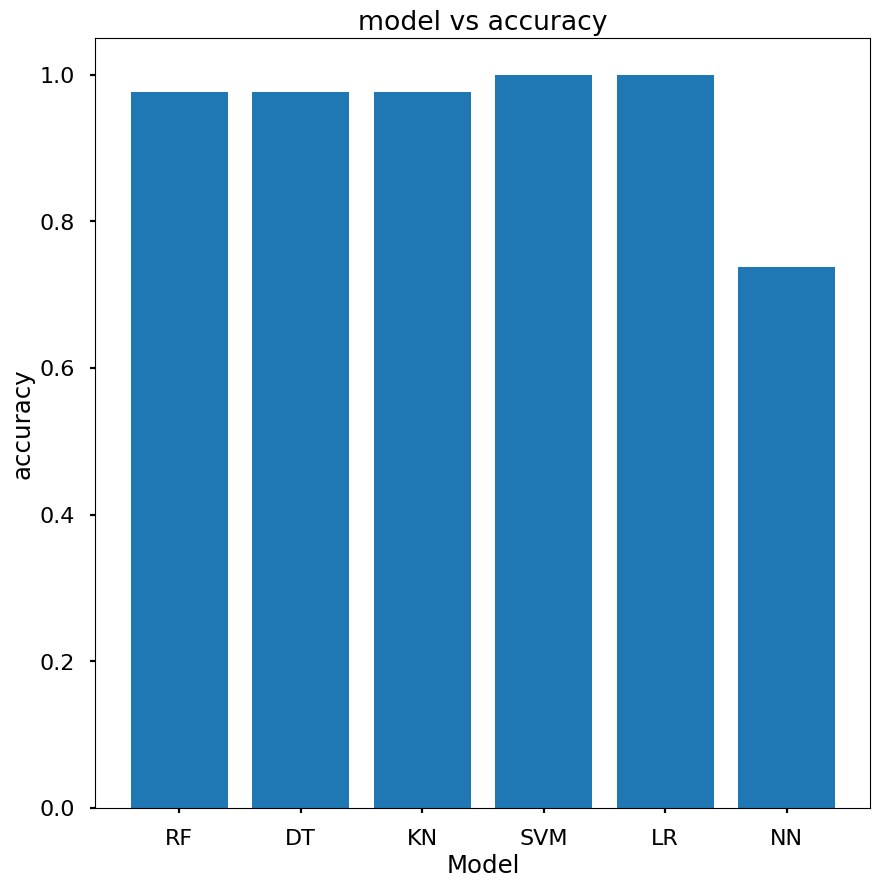

In [90]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("model vs accuracy")
plt.xlabel("Model")
plt.ylabel("accuracy")
plt.bar(model_list,accuracy_list)

plt.show()